In [362]:
import scipy, sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
sys.path.append("/Users/alex/Desktop/Fabry-Perot/modelling")
sys.path.append(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\modelling")
sys.path.append(r"C:\Users\ge85rek\Desktop\Fabry-Perot\modelling")
import read_csv, T_and_R
#data = read_csv.read_csv(r"/Users/alex/Desktop/Fabry-Perot/data/InGaN_FTIR.csv") #MacOS
data = read_csv.read_csv(r"C:\Users\ge85rek\Desktop\Fabry-Perot\data\InGaN_FTIR.csv") #Labor
#data = read_csv.read_csv(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\data\InGaN_FTIR.csv") # PC

In [363]:
# von cm zu m 
frequenz = scipy.constants.c * np.array(data[0][::-1]) * 100
wavelength = scipy.constants.c/frequenz

In [364]:
# return index of a sorted list wherelist[index] is a specific value
def find_nearest(array, value):
    array = np.asarray(array)
    end = (np.abs(array - value)).argmin()
    return end

def flatten(data, N = 1200, cutdown = None, cutup = None):
    smooth = np.convolve(data, np.ones(N)/N, mode='same')
    return smooth[cutdown:cutup], data[cutdown:cutup]-smooth[cutdown:cutup]

def länge(m,n,f):
    lam = scipy.constants.c/f
    return m * lam / (2 * n)

def calculate_m(min_frequenz_array):
    lambda_array = [scipy.constants.c/f for f in min_frequenz_array]
    m_array = []
    for i in range(0,len(lambda_array)-1):
        m_array.append(lambda_array[i+1]/(lambda_array[i]-lambda_array[i+1]))
    return m_array

def calculate_m_looking_back(min_frequenz_array):
    lambda_array = [scipy.constants.c/f for f in min_frequenz_array]
    m_array = []
    for i in range(1,len(lambda_array)):
        m_array.append(lambda_array[i-1]/(lambda_array[i-1]-lambda_array[i]))
    return m_array

def polynomial(x,a0,a1,a2,a3,a4):
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 

def sine(x,k,A,phi):
    return A*np.sin(k*x-phi)

def refractive_index(m,L,f):
    wavelength = scipy.constants.c/f
    n = (m * wavelength) / (2 * L)
    return n 

def fit_individually(xlim_lower_value,xlim_upper_value,x_dataset,y_dataset, p0 = [1,1,1,1,1]):
    x_lim_lower = find_nearest(x_dataset,xlim_lower_value)
    x_lim_upper = find_nearest(x_dataset,xlim_upper_value)
    x_data_modified = x_dataset[x_lim_lower:x_lim_upper]
    y_data_modified = y_dataset[x_lim_lower:x_lim_upper]
    params_fit, cov_fit = scipy.optimize.curve_fit(polynomial,x_data_modified,y_data_modified, p0 = p0)
    fitfunc = polynomial(x_data_modified,*params_fit)
    min_fit_index = scipy.signal.argrelmin(fitfunc, order = 500)
    min_fit_frequenz = x_data_modified[min_fit_index]
    min_fit_absorption = fitfunc[min_fit_index]
    plt.plot(x_data_modified,y_data_modified)
    plt.plot(min_fit_frequenz,min_fit_absorption, "ro")
    plt.plot(x_data_modified,fitfunc)
    return min_fit_frequenz, min_fit_absorption

In [365]:
cutdown = find_nearest(frequenz, 0.6e14)
cutup = find_nearest(frequenz, 1.95e14)
ends = 600
frequenz_20_cut = frequenz[cutdown:cutup]
frequenz_20_no_edge = frequenz[cutdown+ends:cutup-ends]
data_Lumilog_GaN_20 = data[1][::-1][cutdown:cutup]
data_Lumilog_GaN_20_no_edge = data_Lumilog_GaN_20[ends:-ends]
Lumilog_GaN_20_smooth, Lumilog_GaN_smoothed_out = flatten(data_Lumilog_GaN_20, N = 1200)
Lumilog_GaN_20_smooth_no_edge = Lumilog_GaN_20_smooth[ends:-ends]
Lumilog_GaN_20_smoothed_out_no_edge = Lumilog_GaN_smoothed_out[ends:-ends]

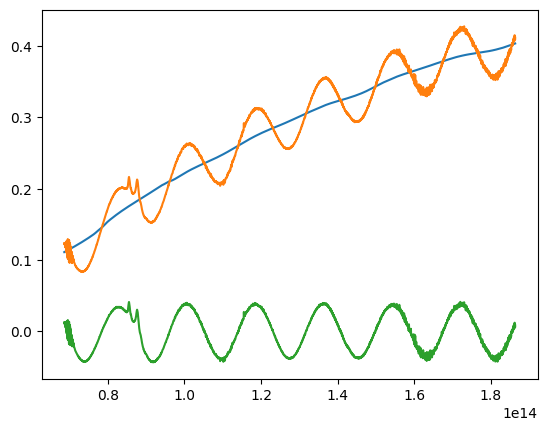

In [366]:
plt.plot(frequenz_20_no_edge, Lumilog_GaN_20_smooth_no_edge)
plt.plot(frequenz_20_no_edge, data_Lumilog_GaN_20_no_edge)
plt.plot(frequenz_20_no_edge, Lumilog_GaN_20_smoothed_out_no_edge)

### Bei 20C


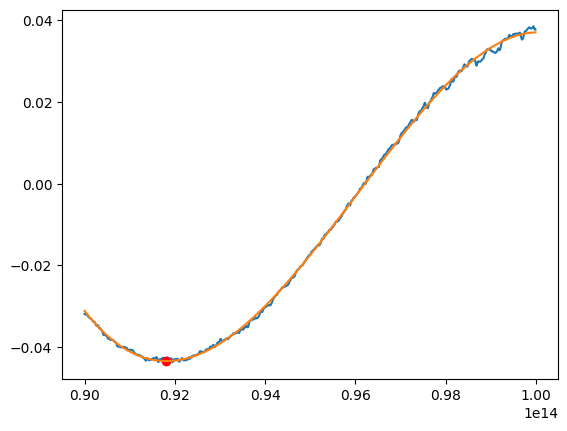

In [367]:
min_frequenz_first, min_absorption_first = fit_individually(0.9e14,1.0e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

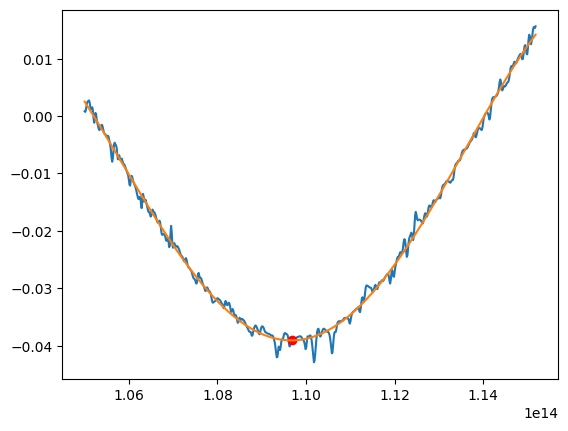

In [368]:
min_frequenz_second, min_absorption_second = fit_individually(1.05e14,1.152e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

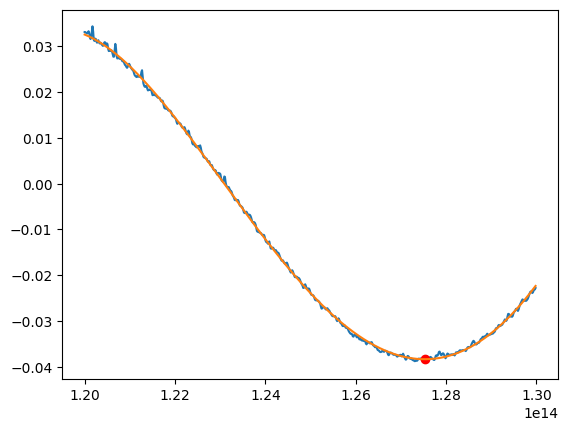

In [369]:
min_frequenz_third, min_absorption_third = fit_individually(1.2e14,1.3e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge,p0 = [1,1,1,1,1])

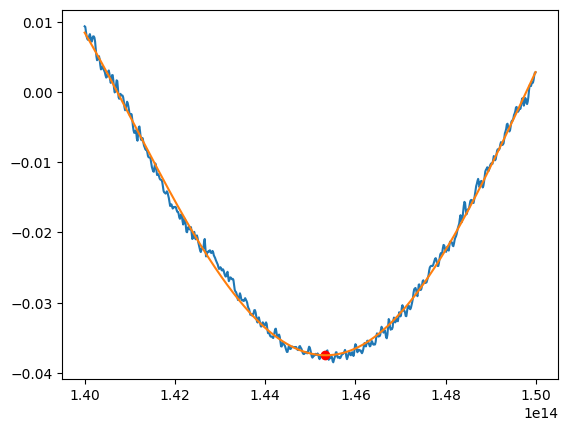

In [370]:
min_frequenz_fourth, min_absorption_fourth = fit_individually(1.4e14,1.5e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

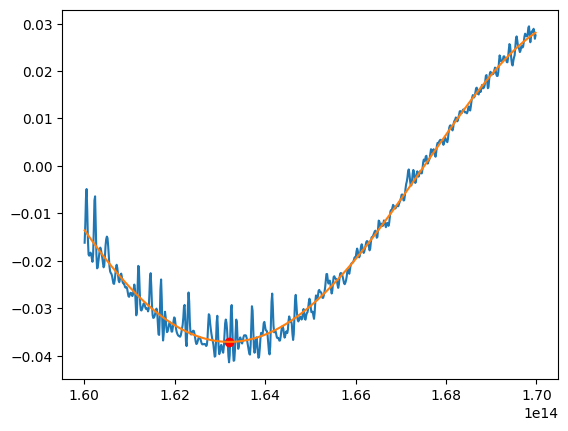

In [371]:
min_frequenz_fifth, min_absorption_fifth = fit_individually(1.6e14,1.7e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

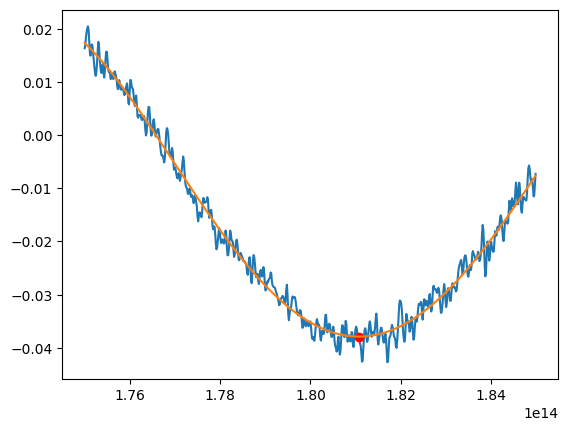

In [372]:
min_frequenz_sixth, min_absorption_sixth = fit_individually(1.75e14,1.85e14,frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

In [373]:
min_frequenz_total = [min_frequenz_first, min_frequenz_second, min_frequenz_third, min_frequenz_fourth, min_frequenz_fifth, min_frequenz_sixth]
min_absorption_total = [min_absorption_first, min_absorption_second, min_absorption_third, min_absorption_fourth, min_absorption_fifth, min_absorption_sixth]
min_frequenz_total = [item[0] for item in min_frequenz_total]
min_absorption_total = [item[0] for item in min_absorption_total]

In [374]:
min_frequenz_total

[91806239672793.34,
 109673112953802.92,
 127525530842072.66,
 145334582522143.62,
 163201455833132.44,
 181068329114142.03]

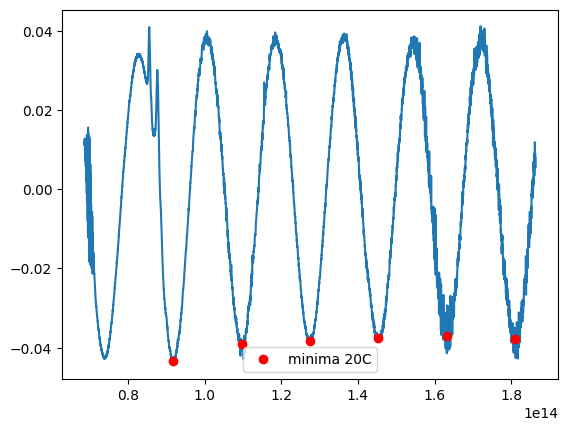

In [375]:
plt.plot(frequenz_20_no_edge,Lumilog_GaN_20_smoothed_out_no_edge)
plt.plot(min_frequenz_total,min_absorption_total, "ro", label = "minima 20C")
plt.legend()

In [376]:
m_array_total = calculate_m(min_frequenz_total)
m_array_total

[5.138349515825623,
 6.143319837133414,
 7.160714289171207,
 8.134304194833982,
 9.134304210160636]

In [377]:
m_array_clean = np.arange(5,11)

In [378]:
n_array_total = []
for i in range(0,len(m_array_clean)):
    n_array_total.append(refractive_index(m_array_clean[i],3.5e-6,min_frequenz_total[i]))
n_array_total

[2.3324936383758605,
 2.3430078446687306,
 2.350842658881086,
 2.3574564708148342,
 2.36178926243223,
 2.3652669801245234]

In [379]:
params_fit, cov_fit = scipy.optimize.curve_fit(polynomial,min_frequenz_total,n_array_total)

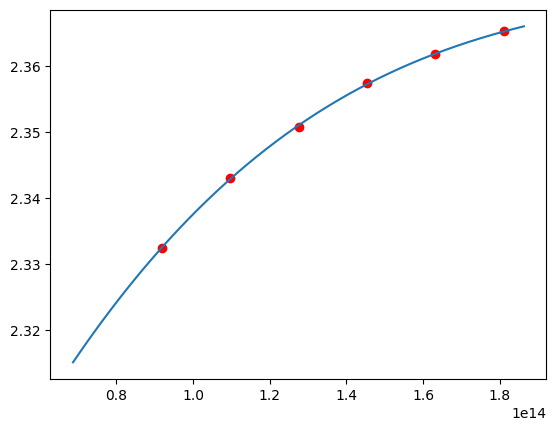

In [380]:
plt.plot(min_frequenz_total,n_array_total, "ro")
plt.plot(frequenz_20_no_edge,polynomial(frequenz_20_no_edge,*params_fit))

### Bei 80C

In [381]:
cutdown_80 = find_nearest(frequenz, 0.6e14)
cutup_80 = find_nearest(frequenz, 1.95e14)
ends_80 = 500
frequenz_80_cut = frequenz[cutdown_80:cutup_80]
frequenz_80_no_edge = frequenz[cutdown_80+ends_80:cutup_80-ends_80]
data_Lumilog_GaN_80 = data[2][::-1][cutdown_80:cutup_80]
data_Lumilog_GaN_80_no_edge = data_Lumilog_GaN_80[ends_80:-ends_80]
Lumilog_GaN_80_smooth, Lumilog_GaN_80_smoothed_out = flatten(data_Lumilog_GaN_80, N = 1200)
Lumilog_GaN_80_smooth_no_edge = Lumilog_GaN_80_smooth[ends_80:-ends_80]
Lumilog_GaN_80_smoothed_out_no_edge = Lumilog_GaN_80_smoothed_out[ends_80:-ends_80]

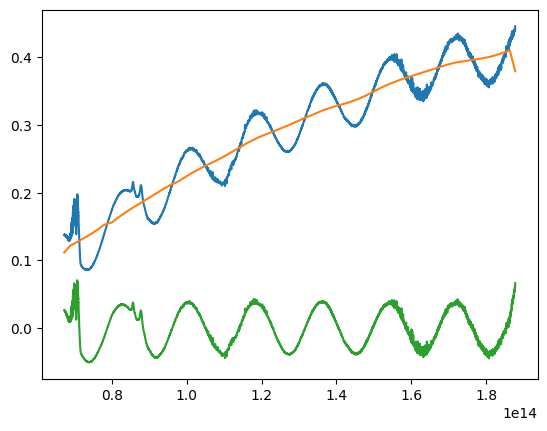

In [382]:
plt.plot(frequenz_80_no_edge, data_Lumilog_GaN_80_no_edge)
plt.plot(frequenz_80_no_edge, Lumilog_GaN_80_smooth_no_edge)
plt.plot(frequenz_80_no_edge, Lumilog_GaN_80_smoothed_out_no_edge)

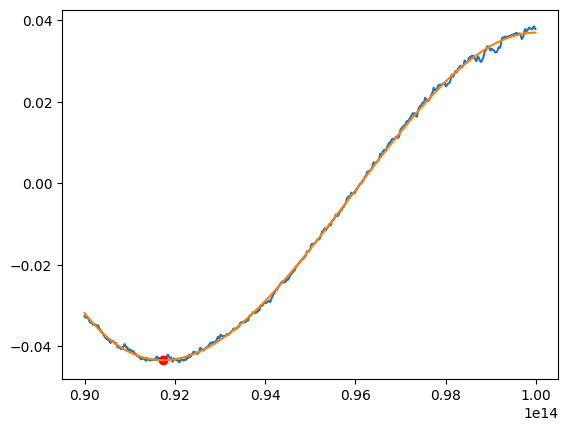

In [383]:
min_frequenz_80_first, min_absorption_80_first = fit_individually(0.9e14,1.0e14,frequenz_80_no_edge,Lumilog_GaN_80_smoothed_out_no_edge)

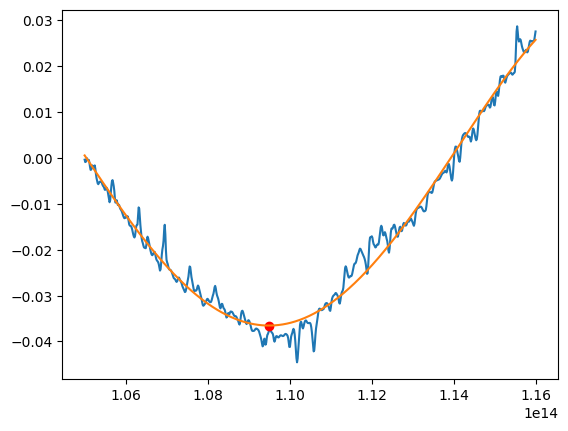

In [384]:
min_frequenz_80_second, min_absorption_80_second = fit_individually(1.05e14,1.16e14,frequenz_80_no_edge,Lumilog_GaN_80_smoothed_out_no_edge)

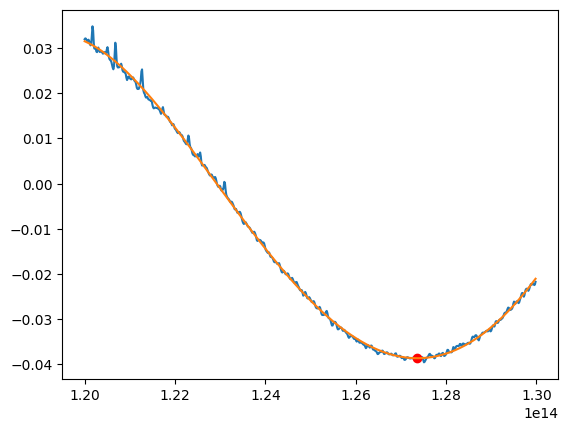

In [385]:
min_frequenz_80_third, min_absorption_80_third = fit_individually(1.2e14,1.3e14,frequenz_80_no_edge,Lumilog_GaN_80_smoothed_out_no_edge)

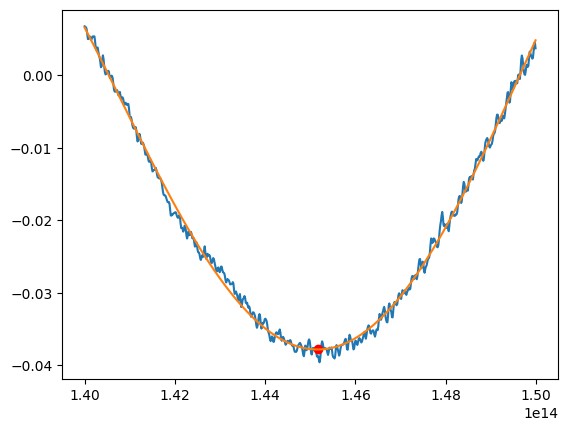

In [386]:
min_frequenz_80_fourth, min_absorption_80_fourth = fit_individually(1.4e14,1.5e14,frequenz_80_no_edge,Lumilog_GaN_80_smoothed_out_no_edge)

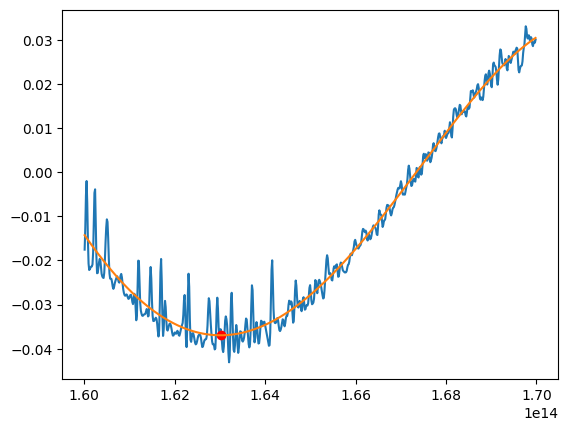

In [387]:
min_frequenz_80_fifth, min_absorption_80_fifth = fit_individually(1.6e14,1.7e14,frequenz_80_no_edge,Lumilog_GaN_80_smoothed_out_no_edge)

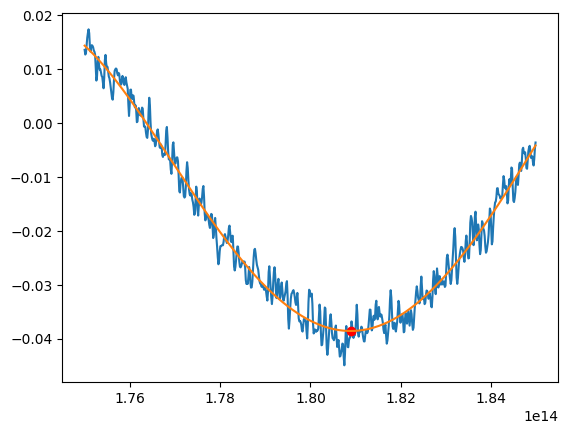

In [388]:
min_frequenz_80_sixth, min_absorption_80_sixth = fit_individually(1.75e14,1.85e14,frequenz_80_no_edge,Lumilog_GaN_80_smoothed_out_no_edge)

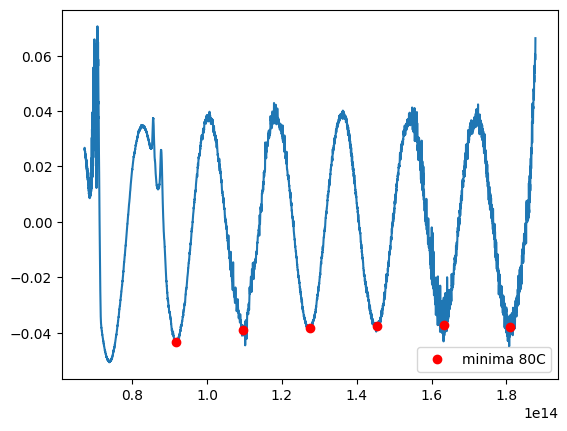

In [389]:
plt.plot(frequenz_80_no_edge,Lumilog_GaN_80_smoothed_out_no_edge)
plt.plot(min_frequenz_total,min_absorption_total, "ro", label = "minima 80C")
plt.legend()

In [390]:
min_frequenz_80_total = [min_frequenz_80_first, min_frequenz_80_second, min_frequenz_80_third, min_frequenz_80_fourth, min_frequenz_80_fifth, min_frequenz_80_sixth]
min_absorption_80_total = [min_absorption_80_first, min_absorption_80_second, min_absorption_80_third, min_absorption_80_fourth, min_absorption_80_fifth, min_absorption_80_sixth]
min_frequenz_80_total = [item[0] for item in min_frequenz_80_total]
min_absorption_80_total = [item[0] for item in min_absorption_80_total]
min_frequenz_80_total

[91733962679114.88,
 109499648180966.31,
 127366521461975.88,
 145161117749306.97,
 163013535637576.72,
 180894864311326.2]

In [391]:
m_array_80_total = calculate_m(min_frequenz_80_total)
m_array_80_total

[5.163547596829564,
 6.128640778873827,
 7.1575954523146335,
 8.131174088451486,
 9.116410676846813]

In [392]:
m_array_80_clean = np.arange(5,11)

In [393]:
n_array_80_total  = []
for i in range(0,len(m_array_80_clean)):
    n_array_80_total.append(polynomial(min_frequenz_80_total[i],*params_fit))
n_array_80_total

[2.33246674754817,
 2.342817294976769,
 2.3509814593142884,
 2.357201901914655,
 2.361848621555062,
 2.3652193656505776]

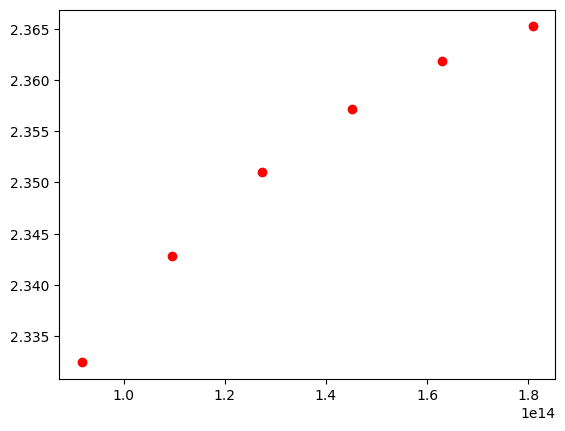

In [394]:
plt.plot(min_frequenz_80_total,n_array_80_total, "ro")

In [395]:
length_80_array = []
for i in range(0,len(m_array_80_clean)):
    length_80_array.append(länge(m_array_80_clean[i],n_array_80_total[i],min_frequenz_80_total[i]))
length_80_array

[3.5027980255606868e-06,
 3.50582967238212e-06,
 3.504162642079301e-06,
 3.5045608718483873e-06,
 3.5039466960763317e-06,
 3.5034267676982647e-06]

### Bei 160C

In [396]:
cutdown_160 = find_nearest(frequenz, 0.6e14)
cutup_160 = find_nearest(frequenz, 1.95e14)
ends_160  = 600
frequenz_160_cut = frequenz[cutdown_160:cutup_160]
frequenz_160_no_edge = frequenz[cutdown_160+ends_160:cutup_160-ends_160]
data_Lumilog_GaN_160 = data[3][::-1][cutdown_160:cutup_160]
data_Lumilog_GaN_160_no_edge = data_Lumilog_GaN_160[ends_160:-ends_160]
Lumilog_GaN_160_smooth, Lumilog_GaN_160_smoothed_out = flatten(data_Lumilog_GaN_160 , N = 1200)
Lumilog_GaN_160_smooth_no_edge = Lumilog_GaN_160_smooth[ends_160:-ends_160]
Lumilog_GaN_160_smoothed_out_no_edge = Lumilog_GaN_160_smoothed_out[ends_160:-ends_160]

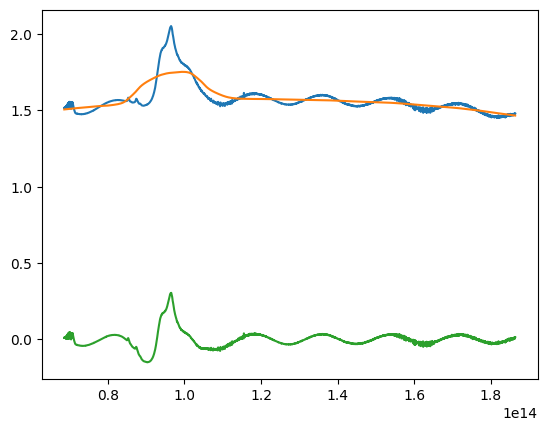

In [397]:
plt.plot(frequenz_160_no_edge, data_Lumilog_GaN_160_no_edge)
plt.plot(frequenz_160_no_edge, Lumilog_GaN_160_smooth_no_edge)
plt.plot(frequenz_160_no_edge, Lumilog_GaN_160_smoothed_out_no_edge)

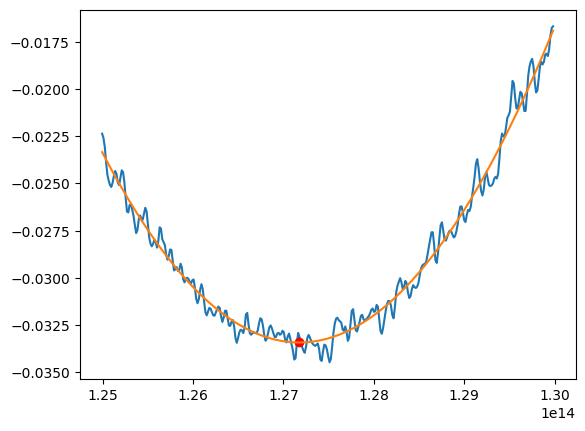

In [398]:
min_frequenz_160_first, min_absorption_160_first = fit_individually(1.25e14,1.3e14,frequenz_160_no_edge,Lumilog_GaN_160_smoothed_out_no_edge)

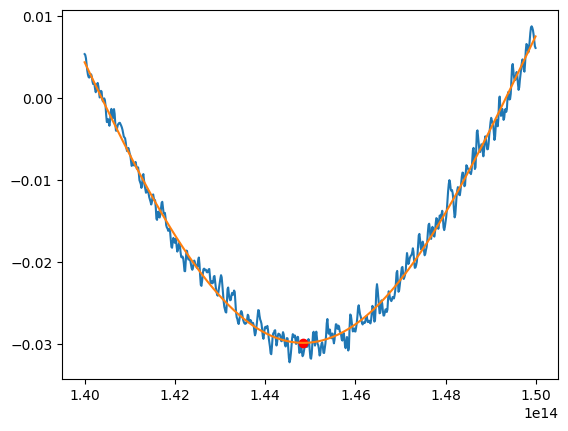

In [399]:
min_frequenz_160_second, min_absorption_160_second = fit_individually(1.4e14,1.5e14,frequenz_160_no_edge,Lumilog_GaN_160_smoothed_out_no_edge)

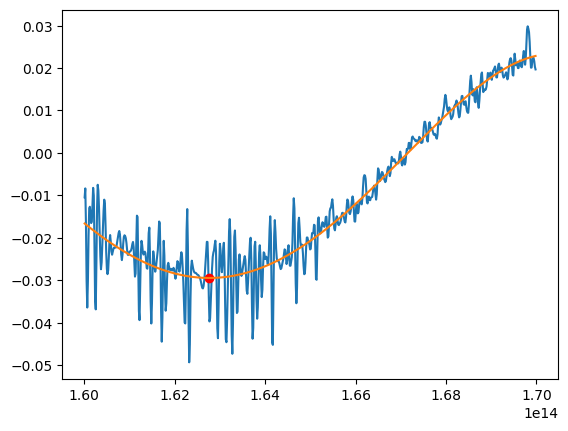

In [400]:
min_frequenz_160_third, min_absorption_160_third = fit_individually(1.6e14,1.7e14,frequenz_160_no_edge,Lumilog_GaN_160_smoothed_out_no_edge)

In [401]:
min_frequenz_160_total = [min_frequenz_160_first, min_frequenz_160_second, min_frequenz_160_third]
min_absorption_160_total = [min_absorption_160_first, min_absorption_160_second, min_absorption_160_third]
min_frequenz_160_total = [item[0] for item in min_frequenz_160_total]
min_absorption_160_total = [item[0] for item in min_absorption_160_total]


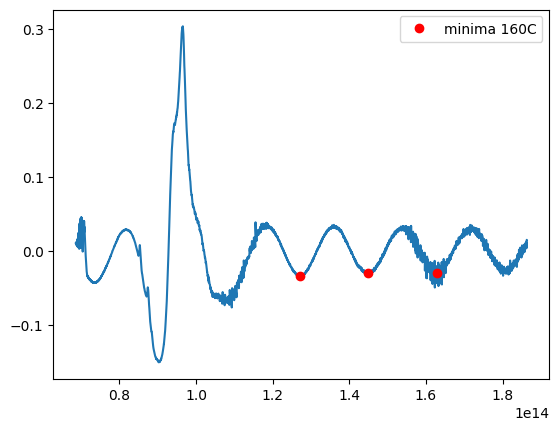

In [402]:
plt.plot(frequenz_160_no_edge,Lumilog_GaN_160_smoothed_out_no_edge)
plt.plot(min_frequenz_160_total,min_absorption_160_total, "ro", label = "minima 160C")
plt.legend()

In [403]:
m_array_160_total = calculate_m(min_frequenz_160_total)
m_array_160_total

[7.199672669938233, 8.080645160939623]

In [404]:
m_array_160_clean = np.arange(7,10)

In [405]:
n_array_160_total  = []
for i in range(0,len(m_array_160_clean)):
    n_array_160_total.append(polynomial(min_frequenz_160_total[i],*params_fit))
n_array_160_total

[2.350906164422605, 2.3571055986658314, 2.361794068779932]

In [406]:
length_160_array = []
for i in range(0,len(m_array_160_clean)):
    length_160_array.append(länge(m_array_160_clean[i],n_array_160_total[i],min_frequenz_160_total[i]))
length_160_array

[3.50945282020939e-06, 3.512399015431496e-06, 3.5093179031957763e-06]

In [407]:
min_frequenz_total

[91806239672793.34,
 109673112953802.92,
 127525530842072.66,
 145334582522143.62,
 163201455833132.44,
 181068329114142.03]

In [408]:
min_frequenz_80_total

[91733962679114.88,
 109499648180966.31,
 127366521461975.88,
 145161117749306.97,
 163013535637576.72,
 180894864311326.2]

In [409]:
min_frequenz_160_total

[127178601266420.17, 144843098959134.22, 162767793841082.44]